In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
#import soundfile as sf
import numpy as np
import os
import librosa
from IPython.display import display, Audio
from hugging_models import hugrestore
from audio_preprocessing import preprocessing as pp
from tensorflow.keras import models

In [4]:
sr = 16000

**put noisy file into '/audio_data/audio_in/' folder and change file name below (without extention .wav)**

In [5]:
audio_in = 'book_00000_chp_0009_reader_06709_17_seg_live_phone_1'
full_path_in = os.path.join('audio_data', 'audio_in', audio_in + '.wav')

**uncleaned:**

In [6]:
Audio(data=librosa.load(full_path_in, sr=sr)[0],  rate=sr)

In [7]:
spectro_uncleaned = hugrestore.wav_to_spectro(full_path_in, sr=sr)[0]

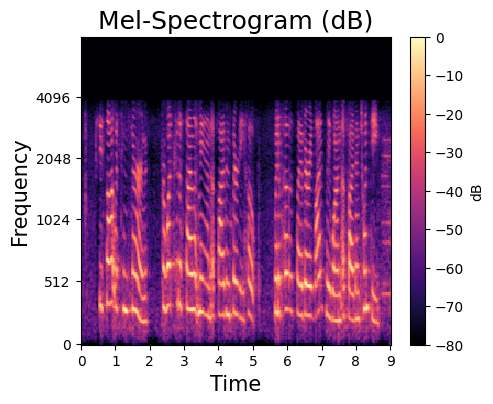

In [8]:
pp.plot_mel_spectrogram(spectro_uncleaned, sr, figsize=(5,4))

**cleaned with hugging face:**

In [9]:
spectro_cleaned_dns4, aud = hugrestore.dns4_16k(audio_in)

Resampling the audio from 48000 Hz to 16000 Hz
File restored with 'speechbrain/sepformer-dns4-16k-enhancement' and saved as 'book_00000_chp_0009_reader_06709_17_seg_live_phone_1-dns4-16k-res.wav' in 'audio_data/audio_out' folder.


In [10]:
spectro_cleaned_dns4.shape

(256, 282)

In [11]:
Audio(data=aud, rate=sr)

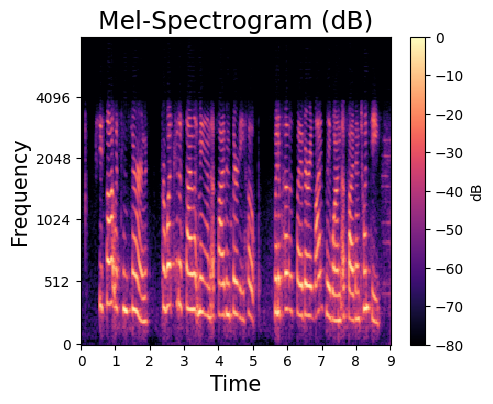

In [12]:
pp.plot_mel_spectrogram(spectro_cleaned_dns4, sr, figsize=(5,4))

**cleaned with our model autoencoder_010:**

In [15]:
autoencoder_do = models.load_model('autoencoder_010/')

In [16]:
sr = 16000
x, sr = librosa.load(full_path_in, sr=sr)
spectrogram_in = pp.waveform_2_spectrogram(x, sr=sr)
spectrogram_in_t =  np.transpose(spectrogram_in)
restored_spectrogram_in_t = autoencoder_do.predict(spectrogram_in_t)

reconstructed_restored_test = pp.spectrogram_2_waveform (np.transpose(restored_spectrogram_in_t), sr=sr)
# print ("reconstructed_test")
Audio(data=reconstructed_restored_test, rate=sr)
# pp.plot_mel_spectrogram(test_sg,sr, figsize=(2,2))


# print ("reconstructed_restored_degraded_test")
# IPython.display.display(IPython.display.Audio(data=reconstructed_restored_test,  rate=sr))
# pp.plot_mel_spectrogram(np.transpose(restored_test_sg_t),sr, figsize=(2,2))

9/9 [==============================] - 0s 2ms/step


In [17]:
spectro_cleaned_ourmod = np.transpose(restored_spectrogram_in_t)

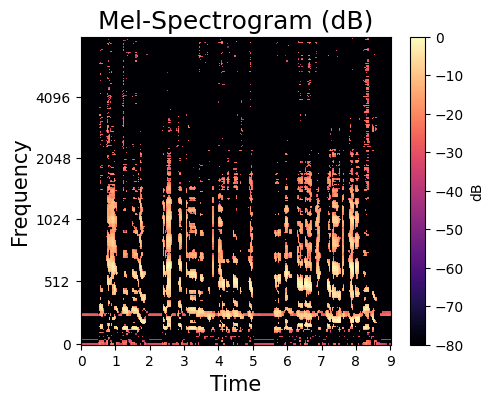

In [18]:
pp.plot_mel_spectrogram(spectro_cleaned_ourmod, sr, figsize=(5,4))

In [19]:
#spectro_uncleaned, spectro_cleaned_dns4, spectro_cleaned_ourmod

**parallel - sum of hugging + our (autoencoder_010):**

In [20]:
spectro_sum = spectro_cleaned_dns4 + spectro_cleaned_ourmod

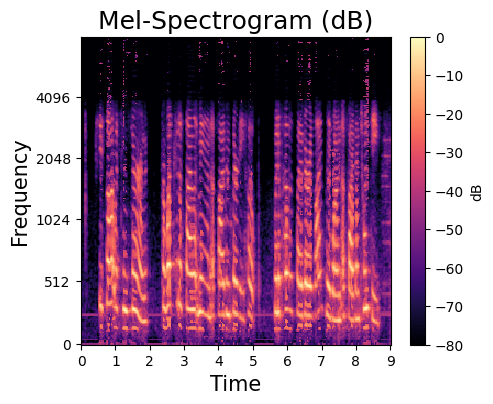

In [21]:
pp.plot_mel_spectrogram(spectro_sum, sr, figsize=(5,4))

In [22]:
Audio(data=pp.spectrogram_2_waveform(spectro_sum, sr), rate=sr)

**sequential - our model after hugging face cleaning:**

In [23]:
spectrogram_hugging_t =  np.transpose(spectro_cleaned_dns4)
restored_spectrogram_hugging_t = autoencoder_do.predict(spectrogram_hugging_t)
reconstructed_restored_spectrogram_hugging = pp.spectrogram_2_waveform(np.transpose(restored_spectrogram_hugging_t), sr=sr)
Audio(data=reconstructed_restored_test, rate=sr)

# pp.plot_mel_spectrogram(test_sg,sr, figsize=(2,2))

9/9 [==============================] - 0s 3ms/step
